<div><img src="https://www.fullstackpython.com/img/logos/scipy.png" width=300></div>

* soubor matematických funkcí a operací
* postavena na NumPy
* SciPy + SymPy je alternativa k MATLAB, Octave
* MATLAB 
  *  má prostředí, které usnadňuje práci
  *  licence
  *  lze OOP
* Python 
  *  je více flexibilní
  *  open-source
  *  OOP od plenek

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Speciální funkce
* různé matematické funkce a fyzikální vzorečky
* vstup a výstup funkcí jsou obvykle ndarray

In [4]:
from scipy import special as sc

### př: gamma funkce

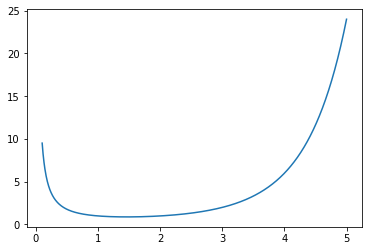

In [5]:
x = np.linspace(0.1,5,1000)
y = sc.gamma(x)
plt.plot(x,y); # for MATLAB users + in jupyter it does not produce output

### př: beta funkce

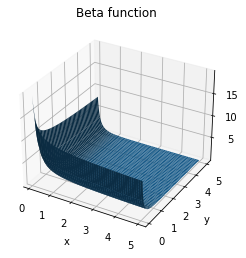

In [6]:
X, Y = np.meshgrid(x, x)
Z = sc.beta(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,)
ax.set_title('Beta function')
ax.set_xlabel('x')
ax.set_ylabel('y');

## Integrace

In [7]:
from scipy import integrate

### Quad
* integrace na reálných číslech
* výstup je tuple (aproximace výsledku, chyba)
* využití lambda výrazů

In [8]:
import math
integrate.quad(np.sin, 0, math.pi/2)

(0.9999999999999999, 1.1102230246251564e-14)

In [9]:
integrate.quad(lambda x: np.exp(-x) , 0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

In [10]:
# ...Warning
integrate.quad(lambda x: x , 0, np.inf)

<ipython-input-10-d10ea2803127>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(lambda x: x , 0, np.inf)


(0.4999999961769933, 5.7336234760563265e-06)

In [11]:
# ...Warning
integrate.quad(lambda x: 1/x , 0, np.inf)

<ipython-input-11-0ff022367bac>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(lambda x: 1/x , 0, np.inf)


(48.720960971461565, 16.30167063049395)

### dblquad, nquad
* dvojitá a n-tá integrace na reálných číslech
* meze integrace mohou být závislé na integrujicí proměnné
* dblquad a nquad pro n = 2 mají "prohozené" meze

In [12]:
func1 = lambda x,z: x*x*z
integrate.dblquad(func1, 0, 1, 0, 5)  # boundaries for x are 0, 5

(20.833333333333336, 4.615884440936191e-13)

In [13]:
func2 = lambda x,z: x*z
integrate.dblquad(func2, 0, 1, lambda x: 1+x, lambda x: 5-x)

(3.9999999999999996, 6.661306739153578e-14)

In [14]:
integrate.nquad(func1, [[0,5], [0, 1]])   # reverse order than dblquad

(20.833333333333336, 4.615884440936191e-13)

In [15]:
integrate.nquad(func2, [lambda x: [1+x, 5-x], [0,1]])

(3.9999999999999996, 6.661306739153578e-14)

### Aproximace integrace

* libovolné dělení intervalu
 * defaultně $dx = 1$
* trapz: lineární interpolace
* simps: průběh funkce mezi třemi body aproximuje parabolou

In [16]:
aux = np.linspace(0, math.pi/2, 1000)
x = np.sin(aux)
integrate.trapz(x)  # ...default dx = 1.0

635.9830215644837

In [17]:
aux = np.linspace(0, math.pi/2, 1000)
x = np.sin(aux)
integrate.trapz(x, aux)

0.999999793971382

In [18]:
integrate.simps(x, aux)

0.9999999998379302

In [19]:
1.0 - integrate.simps(x, aux) < 1.0 - integrate.trapz(x, aux)

True

## Řešení ODR
př: Bratův problém:
* okrajová úloha na reálných číslech

$y'' + e^y = 0$

$y(0) = 0,\; y(1) = 0$

* potřeba transformace na systém ODR prvního řádu

$ y_0' = y_1$

$ y_1' = -e^{y_0}$

In [20]:
func = lambda x,y: np.vstack((y[1], -np.exp(y[0])))

definujeme mřížku a okrajové podmínky:

In [21]:
mesh = np.linspace(0, 1, 100)
bc = lambda x,y: np.array([x[0], y[0]])

připravíme pole pro výsledky:

In [22]:
y = np.zeros((2, mesh.size))   # length of y in func is 2 

řešení:

In [23]:
res = integrate.solve_bvp(func, bc, mesh, y)

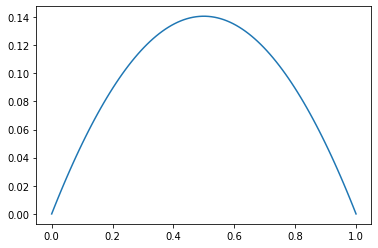

In [24]:
plt.plot(mesh, res.sol(mesh)[0]);

* Pro počáteční podmínky máme funkci *solve_ivp*

## Interpolace

### interp1d
* interpolace v 1d
* lineární interpolace
* instanci této třídy lze použít jako funkci ( \_\_call__ )

In [25]:
from scipy.interpolate import interp1d

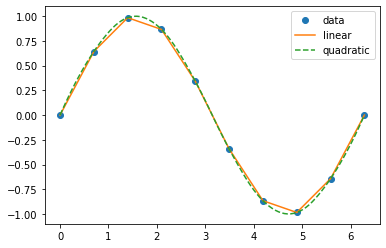

In [26]:
n = 10
x = np.linspace(0, 2*math.pi, n)
x_new = np.linspace(0, 2*math.pi, 10*n)
y = np.sin(x)
f1 = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
plt.plot(x, y, 'o', x_new, f1(x_new), x_new, f2(x_new), '--')
plt.legend(['data', 'linear', 'quadratic']);

* hodnota nejbližšího, předešlého a dalšího bodu 

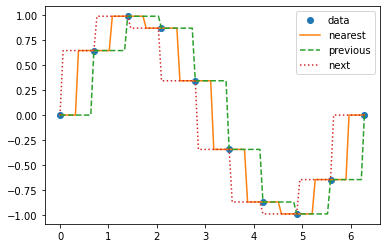

In [27]:
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')
plt.plot(x, y, 'o', x_new, f1(x_new), x_new, f2(x_new), '--', x_new, f3(x_new), ':')
plt.legend(['data', 'nearest', 'previous', 'next']);

### griddata
* vícerozměrná interpolace
#### př:
* chceme interpolovat funkci $f:\mathbb{R}^2\longrightarrow\mathbb{R}$
* známe pouze hodnoty v bodech (x[i], y[i])
* body nevytvářejí pravidelnou mřížku

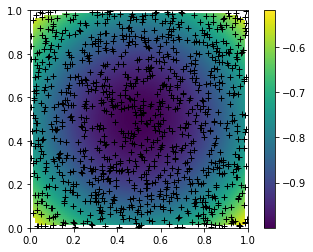

In [28]:
from scipy.interpolate import griddata
x, y = np.mgrid[0:1:100j, 0:1:100j]
points = np.random.rand(1000, 2)           # decrease it to 100
def func(x, y):
    xs, ys = 0.5, 0.5
    R = 1
    return (xs-x)*(xs-x) + (ys-y)*(ys-y) - R*R
values = func(points[:,0], points[:,1])
f1 = griddata(points, values, (x, y))
plt.plot(points[:,0], points[:,1], 'k+')
plt.imshow(f1, extent=(0,1,0,1))
plt.colorbar();

## Statistika

### Spojitá rozdělení
* náhodná veličina s normálním rozdělením

In [29]:
from scipy.stats import norm
from scipy.stats import gamma

In [30]:
rvn = norm(loc=5, scale=3)
rvg = gamma(loc=5, scale=3, a=2)

* Kumulativní distribuční funkce

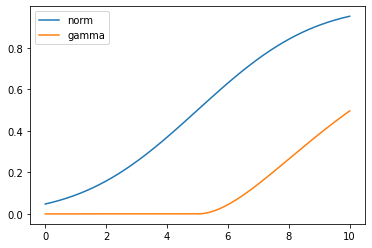

In [31]:
x = np.linspace(0, 10, 1000)
plt.plot(x, rvn.cdf(x), x, rvg.cdf(x))
plt.legend(['norm', 'gamma']);

In [32]:
rvn.cdf([0,5,10])

array([0.04779035, 0.5       , 0.95220965])

* hustota pravděpodobnosti

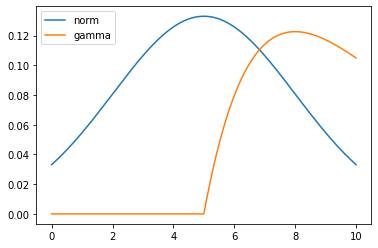

In [33]:
plt.plot(x, rvn.pdf(x), x, rvg.pdf(x))
plt.legend(['norm', 'gamma']);

In [34]:
rvn.pdf([0,5,10])

array([0.03315905, 0.13298076, 0.03315905])

* kvantilová funkce

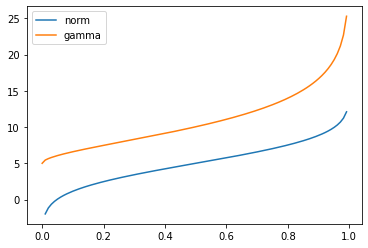

In [35]:
plt.plot(x, rvn.ppf(x), x, rvg.ppf(x))
plt.legend(['norm', 'gamma']);

In [36]:
rvn.ppf([0, 0.5, 1])

array([-inf,   5.,  inf])

* střední hodnota
 * pro normální rozdělení odpovídá loc

In [37]:
print('norm:  {}\ngamma: {}\n'.format(rvn.mean(), rvg.mean()))

norm:  5.0
gamma: 11.0



* rozptyl
 * pro normální rozdělení odpovídá scale

In [38]:
print('norm:  {}\ngamma: {}\n'.format(rvn.var(), rvg.var()))

norm:  9.0
gamma: 18.0



* stats

In [39]:
print('norm:  {}\ngamma: {}\n'.format(rvn.stats(), rvg.stats()))

norm:  (array(5.), array(9.))
gamma: (array(11.), array(18.))



pokud chceme získat zpět standardní rozdělení (loc = 0, scale = 1), tak transformujeme hustotu pravděpodobnosti následujícím způsobem

$f^*_{std}(x) = f(scale\cdot x + loc)$

a škálujeme tak, aby $A\int_{\mathbb{R}}f^*_{std}=1$

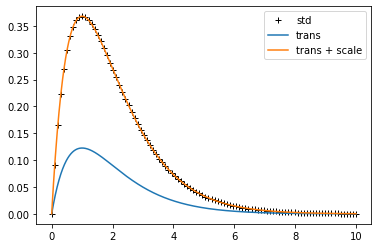

In [40]:
x2 = np.linspace(0, 10, 100)
plt.plot(x2, gamma(loc=0, scale=1, a=2).pdf(x2), 'k+', x, rvg.pdf((3*x+5)),  x, 3*rvg.pdf((3*x+5)),  )
plt.legend(['std', 'trans', 'trans + scale']);

* standardní odchylka

In [41]:
print('norm:  {}\ngamma: {}\n'.format(rvn.std(), rvg.std()))

norm:  3.0
gamma: 4.242640687119285



* obecné momenty

In [42]:
print('norm:  {}\ngamma: {}\n'.format(rvn.moment(1), rvg.moment(1)))

norm:  5.0
gamma: 11.0



* generování sekvence náhodných čísel dle určitého rozdělení
 * používá numpy.random

nepreproduktibilní:

In [43]:
rvn.rvs(5)

array([8.61752827, 2.77843539, 2.71017542, 0.27131103, 6.85531724])

reproduktibilní:
 * RandomState

In [44]:
rvn.rvs(5, 12345)

array([ 4.38587702,  6.43683001,  3.44168385,  3.33280909, 10.89734172])

##### pozn:
* dle dokumentace bychom měli spíš používat BitGenerators a Generators, jak jsme si říkali v NumPy
* Proč?
 * RandomState je pro Legacy Generators

### Diskrétní rozdělení
* stejné metody, akorát pdf -> pmf
* scale neexistuje

In [45]:
from scipy.stats import binom

In [46]:
rvb = binom(n=15, p=0.5, loc=5)

In [47]:
rvb.stats()

(array(12.5), array(3.75))

* Kumulační distribuční funkce

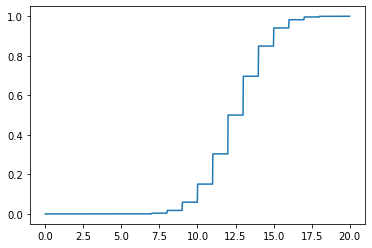

In [48]:
x = np.arange(0, 21)
x_new = np.linspace(0, 20, 1000)
F = interp1d(x, rvb.cdf(x), kind='previous')
plt.plot(x_new, F(x_new));

In [49]:
rvb.cdf([0, 1, 2, 3, 4, 5, 6])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.05175781e-05, 4.88281250e-04])

* hustota pravděpodobnosti

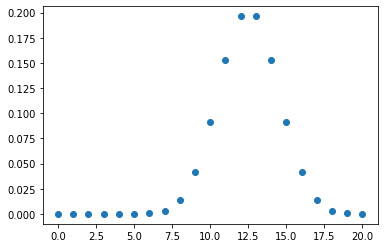

In [50]:
x = np.arange(0, 21)
plt.plot(x, rvb.pmf(x), 'o');

* kvantilová funkce
 * cdf je stupňovitá funkce

In [51]:
x = np.arange(5, 21)
rvb.ppf(rvb.cdf(x))

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20.])

In [52]:
rvb.ppf(rvb.cdf(x)+1e-10)

array([ 6.,  7.,  8.,  9.,  9., 10., 12., 13., 14., 15., 16., 17., 18.,
       19., 20., nan])

### Tvoření vlastního rozdělení

#### spojité
 * tzn: subclassing rv_continuous

In [53]:
from scipy import stats

In [60]:
class MineDis(stats.rv_continuous):
    def _cdf(self, x):
        return np.where((-1 < x) & (x < 1), 1, 0)

In [61]:
rvd = MineDis()
rvd.cdf(np.arange(-3, 3, 0.5))

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.])

* pdf už je spočtená
 * nebo alespoň to tak vypadá

In [62]:
rvd.pdf(np.arange(-3, 3, 0.5))

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.83333333e+04,  4.16333634e-12,  4.16333634e-12,  4.16333634e-12,
       -5.83333333e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

* pozor!!!
 * integrál by měl vyjít jedna

In [67]:
integrate.quad(rvd.pdf, -1, 1)

(8.326672684688674e-12, 9.244463733058732e-26)

In [65]:
integrate.quad(rvd.pdf, -1e-3, 1e-3)

(8.326672684688674e-15, 9.244463733058732e-29)

##### diskrétní rozdělení: DÚ

In [72]:
import webbrowser
webbrowser.open('https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#subclassing-rv-discrete')

True

## Octave (MATLAB)
* nahrání .mat z Octave do SciPy

In [31]:
import scipy.io as sio

In [32]:
a = sio.loadmat('a.mat')
a

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 5.2.0, 2020-10-02 21:51:24 UTC',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[[1., 4., 7.],
         [2., 5., 8.],
         [3., 6., 9.]]])}

In [33]:
a = sio.loadmat('a.mat')['a']
a

array([[[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]]])

* z SciPy / NumPy do Octave

In [34]:
v = np.arange(10)
sio.savemat('v.mat', {'v':v})

#### structs / dictionaries

In [69]:
s = sio.loadmat('s.mat')['s']
s

array([[(array([[1.]]), array([[2.]]))]], dtype=[('a', 'O'), ('b', 'O')])

In [72]:
s[0, 0]['a'][0][0]

1.0

In [74]:
d = {'aa':11, 'bb':22}
sio.savemat('d.mat', {'d':d})